<a href="https://colab.research.google.com/github/Estefany66/Prediccion_P2/blob/main/Optica_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv("/content/drive/MyDrive/DataAnual.csv", encoding='ISO-8859-1')
df

,A¤o,Ventas
0,2017,398194
1,2018,473777.6
2,2019,563184.4
3,2020,550980.6
4,2021,775472.9
5,2022,543887.94
6,2023,458.202.67


<Axes: xlabel='A¤o', ylabel='Ventas'>

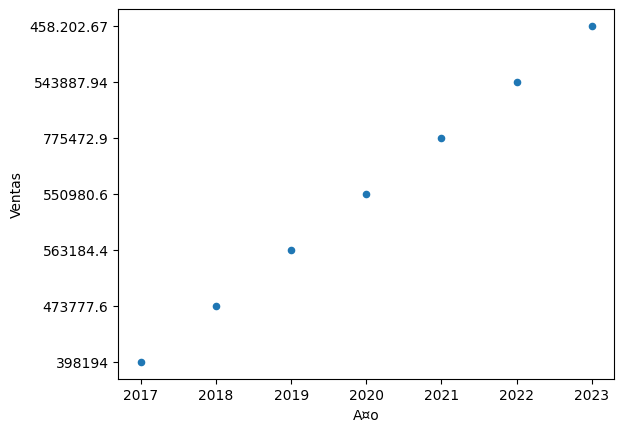

In [12]:
df.plot.scatter(x="A¤o", y="Ventas")

In [20]:
df["A¤o"] = pd.to_numeric(df["A¤o"], errors="coerce")
df.dropna(subset=["A¤o"], inplace=True)
df["Ventas"] = pd.to_numeric(df["Ventas"], errors="coerce")
df.dropna(subset=["Ventas"], inplace=True)
df

,A¤o,Ventas
0,2017,398194.00
1,2018,473777.60
2,2019,563184.40
3,2020,550980.60
4,2021,775472.90
5,2022,543887.94


In [21]:
# @title Creando la regresión
reg = LinearRegression()
reg.fit(df[["A¤o"]], df["Ventas"])

LinearRegression()

In [23]:
# Años de predicción, Creando la regresión
reg.predict([[2024],[2025],[2026]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([759375.75714284, 805700.09428571, 852024.43142857])

In [25]:
#Verificando con la ecuación de la recta **y** = mx+b
print(f"la línea intersecta en : {reg.intercept_} y tiene una pendiente de { reg.coef_}")

la línea intersecta en : -93001082.62000002 y tiene una pendiente de [46324.33714286]


In [26]:
reg.coef_ * df["A¤o"] + reg.intercept_

0    435105.397143
1    481429.734286
2    527754.071429
3    574078.408571
4    620402.745714
5    666727.082857
Name: A¤o, dtype: float64

In [27]:
pred = pd.Series(reg.predict(df[["A¤o"]]))

In [28]:
df["prediccion"] = pred

In [29]:
df

,A¤o,Ventas,prediccion
0,2017,398194.00,435105.397143
1,2018,473777.60,481429.734286
2,2019,563184.40,527754.071429
3,2020,550980.60,574078.408571
4,2021,775472.90,620402.745714
5,2022,543887.94,666727.082857


<Axes: xlabel='A¤o', ylabel='Ventas'>

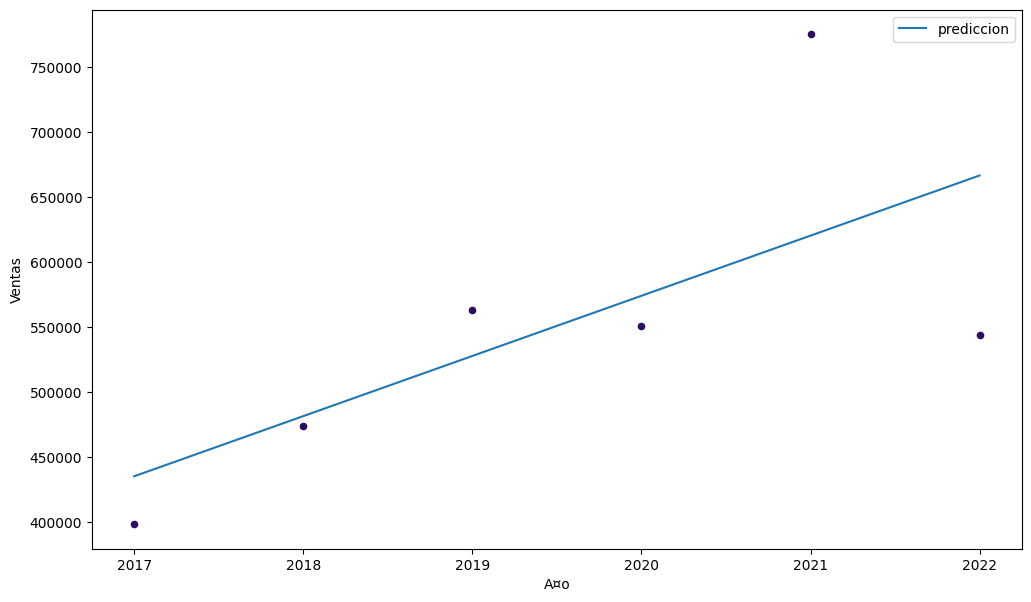

In [30]:
ax = df.plot.line(x="A¤o", y="prediccion")
df.plot.scatter(x="A¤o", y="Ventas", ax= ax, color="#2d0c62", figsize=(12,7))